<a href="https://colab.research.google.com/github/Quratulain786/-R-versus-Python-EDA/blob/main/RF_titanic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Data cleaning Machine Learning**
Dataset Description
Overview
The data has been split into two groups:

training set (train.csv)
test set (test.csv)
The training set should be used to build your machine learning models. For the training set, we provide the outcome (also known as the “ground truth”) for each passenger. Your model will be based on “features” like passengers’ gender and class. You can also use feature engineering to create new features.

The test set should be used to see how well your model performs on unseen data. For the test set, we do not provide the ground truth for each passenger. It is your job to predict these outcomes. For each passenger in the test set, use the model you trained to predict whether or not they survived the sinking of the Titanic.

We also include gender_submission.csv, a set of predictions that assume all and only female passengers survive, as an example of what a submission file should look like.

Data Dictionary
Variable	Definition	Key
survival	Survival	0 = No, 1 = Yes
pclass	Ticket class	1 = 1st, 2 = 2nd, 3 = 3rd
sex	Sex
Age	Age in years
sibsp	# of siblings / spouses aboard the Titanic
parch	# of parents / children aboard the Titanic
ticket	Ticket number
fare	Passenger fare
cabin	Cabin number
embarked	Port of Embarkation	C = Cherbourg, Q = Queenstown, S = Southampton
Variable Notes
pclass: A proxy for socio-economic status (SES)
1st = Upper
2nd = Middle
3rd = Lower
age: Age is fractional if less than 1. If the age is estimated, is it in the form of xx.5
sibsp: The dataset defines family relations in this way...
Sibling = brother, sister, stepbrother, stepsister
Spouse = husband, wife (mistresses and fiancés were ignored)
parch: The dataset defines family relations in this way...
Parent = mother, father
Child = daughter, son, stepdaughter, stepson
Some children travelled only with a nanny, therefore parch=0 for them.

survival: Survival 0 = No, 1 = Yes
pclass: Ticket class 1 = 1st, 2 = 2nd, 3 = 3rd
sex: Sex
Age: Age in years
sibsp: # of siblings / spouses aboard the Titanic
parch: # of parents / children aboard the Titanic
ticket: Ticket number
fare: Passenger fare
cabin: Cabin number
embarked: Port of Embarkation C = Cherbourg, Q = Queenstown, S = Southampton

In [167]:
import pandas as pd
import numpy as np
# Load the dataset
df = pd.read_csv('titanic_data.csv')
df.head()
#https://www.geeksforgeeks.org/data-cleansing-introduction/?ref=lbp
#https://www.datacamp.com/tutorial/random-forests-classifier-python

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [168]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [169]:
# Categorical columns
cat_col = [col for col in df.columns if df[col].dtype == 'object']
print('Categorical columns :',cat_col)

Categorical columns : ['Name', 'Sex', 'Ticket', 'Cabin', 'Embarked']


In [170]:
#Numerical columns
num_col = [col for col in df.columns if df[col].dtype != 'object']
print('Numerical columns :',num_col)

Numerical columns : ['PassengerId', 'Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare']


In [171]:
df[cat_col].nunique()


Name        891
Sex           2
Ticket      681
Cabin       147
Embarked      3
dtype: int64

In [172]:

df1 = df.drop(columns = ['Name','Ticket','Cabin','Cabin','Embarked'])

In [173]:
df1.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [174]:
# %age of  missing values
round((df1.isnull().sum()/df1.shape[0])*100,2)

PassengerId     0.00
Survived        0.00
Pclass          0.00
Sex             0.00
Age            19.87
SibSp           0.00
Parch           0.00
Fare            0.00
dtype: float64

In [175]:
print(df1.shape)
print(df.shape)

(891, 8)
(891, 12)


In [176]:
# Mean imputation  .... Removing Null values
df2 = df1.fillna(df1.Age.mean())
# Let's check the null values again
df2.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Sex            0
Age            0
SibSp          0
Parch          0
Fare           0
dtype: int64

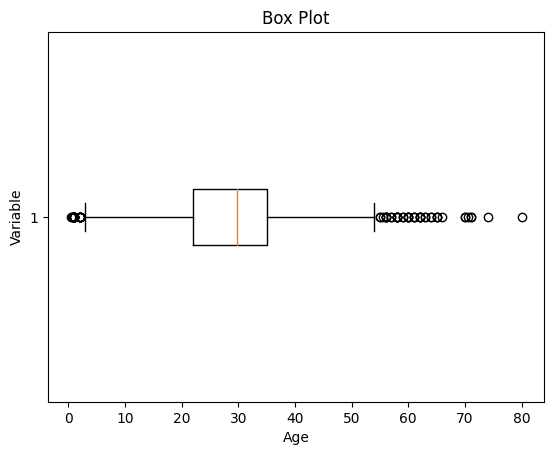

In [177]:
import matplotlib.pyplot as plt

plt.boxplot(df2['Age'], vert=False)
plt.ylabel('Variable')
plt.xlabel('Age')
plt.title('Box Plot')
plt.show()

In [178]:
# calculate summary statistics
mean = df2['Age'].mean()
std = df2['Age'].std()

# Calculate the lower and upper bounds
lower_bound = mean - std*2
upper_bound = mean + std*2

print('Lower Bound :',lower_bound)
print('Upper Bound :',upper_bound)

# Drop the outliers
df3 = df2[(df2['Age'] >= lower_bound)
				& (df2['Age'] <= upper_bound)]

Lower Bound : 3.6950871950530555
Upper Bound : 55.703148099064585


In [179]:
df3.info()


<class 'pandas.core.frame.DataFrame'>
Index: 822 entries, 0 to 890
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  822 non-null    int64  
 1   Survived     822 non-null    int64  
 2   Pclass       822 non-null    int64  
 3   Sex          822 non-null    object 
 4   Age          822 non-null    float64
 5   SibSp        822 non-null    int64  
 6   Parch        822 non-null    int64  
 7   Fare         822 non-null    float64
dtypes: float64(2), int64(5), object(1)
memory usage: 57.8+ KB


In [180]:
from sklearn.preprocessing import LabelEncoder
cols = ['Sex']
le = LabelEncoder()

for col in cols:
    df3[col] = le.fit_transform(df3[col])
df3.head()


,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare
0,1,0,3,1,22.0,1,0,7.2500
1,2,1,1,0,38.0,1,0,71.2833
2,3,1,3,0,26.0,0,0,7.9250
3,4,1,1,0,35.0,1,0,53.1000
4,5,0,3,1,35.0,0,0,8.0500


In [181]:
X = df3[['Pclass','Sex','Age', 'SibSp','Parch','Fare']]
y = df3['Survived']

In [182]:
from sklearn.preprocessing import MinMaxScaler

# initialising the MinMaxScaler
scaler = MinMaxScaler(feature_range=(0, 1))

# Numerical columns
num_col_ = [col for col in X.columns if X[col].dtype != 'object']
x1 = X
# learning the statistical parameters for each of the data and transforming
x1[num_col_] = scaler.fit_transform(x1[num_col_])
x1.head()

,Pclass,Sex,Age,SibSp,Parch,Fare
0,1.0,1.0,0.349515,0.125,0.0,0.014151
1,0.0,0.0,0.660194,0.125,0.0,0.139136
2,1.0,0.0,0.427184,0.000,0.0,0.015469
3,0.0,0.0,0.601942,0.125,0.0,0.103644
4,1.0,1.0,0.601942,0.000,0.0,0.015713


In [183]:
df3[["Sex", "Survived"]].groupby(['Sex'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Sex,Survived
0,0,0.744027
1,1,0.173913


In [184]:
df3['Sex'].value_counts()

Sex
1    529
0    293
Name: count, dtype: int64

In [185]:
df3[["Age", "Survived"]].groupby(['Age'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Age,Survived
1,5.0,1.0
61,53.0,1.0
9,13.0,1.0
8,12.0,1.0
12,15.0,0.8
...,...,...
39,34.5,0.0
29,28.5,0.0
47,40.5,0.0
18,20.5,0.0


In [186]:
#after data engineering
pd.crosstab([df.Embarked,df.Pclass],[df.Sex,df.Survived],margins=True).style.background_gradient(cmap='summer_r')

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,train_size=0.8, random_state=20)

In [187]:
dfs = [X_train, X_test]

In [188]:
# Now Data have no missing values
# function to analyze each column of the dataframe
def display_missing(df4):
    for col in df3.columns.tolist():
        print('{} column missing values: {}'.format(col, df3[col].isnull().sum()))
    print('\n')

for df in dfs:
    print('{}'.format(df3))
    display_missing(df3)

     PassengerId  Survived  Pclass  Sex        Age  SibSp  Parch     Fare
0              1         0       3    1  22.000000      1      0   7.2500
1              2         1       1    0  38.000000      1      0  71.2833
2              3         1       3    0  26.000000      0      0   7.9250
3              4         1       1    0  35.000000      1      0  53.1000
4              5         0       3    1  35.000000      0      0   8.0500
..           ...       ...     ...  ...        ...    ...    ...      ...
886          887         0       2    1  27.000000      0      0  13.0000
887          888         1       1    0  19.000000      0      0  30.0000
888          889         0       3    0  29.699118      1      2  23.4500
889          890         1       1    1  26.000000      0      0  30.0000
890          891         0       3    1  32.000000      0      0   7.7500

[822 rows x 8 columns]
PassengerId column missing values: 0
Survived column missing values: 0
Pclass column mis

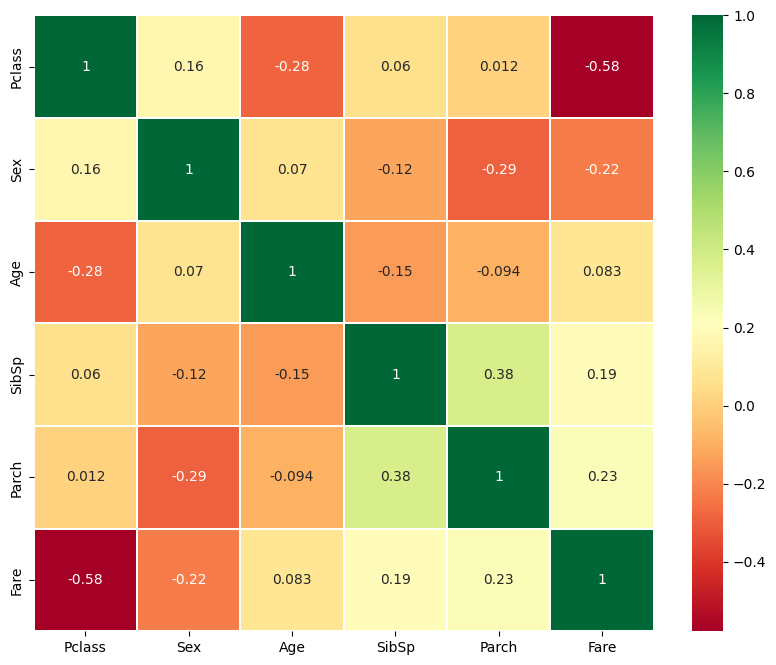

In [189]:
!pip install seaborn matplotlib
import seaborn as sns  # statistical data visualization
sns.heatmap(X_train.corr(), annot=True, cmap='RdYlGn', linewidths=0.2)
fig = plt.gcf()
fig.set_size_inches(10, 8)
plt.show()

# **Decision Tree**

In [190]:
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.metrics import accuracy_score
from sklearn.metrics import ConfusionMatrixDisplay, classification_report

In [191]:
import warnings
warnings.filterwarnings('ignore')

In [192]:
# Initialize and train the Decision Tree model
model = DecisionTreeClassifier()
model.fit(X_train, y_train)

# Calculate the training and testing accuracy
train_accuracy = model.score(X_train, y_train)
test_accuracy = model.score(X_test, y_test)

print("Training Accuracy: ", train_accuracy)
print("Testing Accuracy: ", test_accuracy)

Training Accuracy:  0.9817351598173516
Testing Accuracy:  0.8121212121212121


In [193]:
# Predict the labels for the test set

y_pred = model.predict(X_test)

# Print the predictions
print("Predictions on the test set:", y_pred)

Predictions on the test set: [0 1 0 0 1 0 0 0 1 0 1 1 0 0 0 1 1 0 0 1 1 0 1 0 1 0 0 0 0 0 0 1 0 0 1 1 0
 1 0 0 0 1 0 0 0 0 0 0 1 0 0 0 1 0 1 0 1 1 0 0 0 0 1 1 0 0 0 1 0 0 1 1 0 0
 0 0 1 0 0 0 0 0 1 0 0 0 0 0 0 1 0 0 1 1 0 0 0 0 1 0 0 0 0 0 0 1 0 1 1 0 0
 0 0 0 0 0 0 0 1 0 1 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 0 1 0 0 0 0
 1 0 1 0 1 0 1 0 1 1 0 0 0 0 1 0 0]


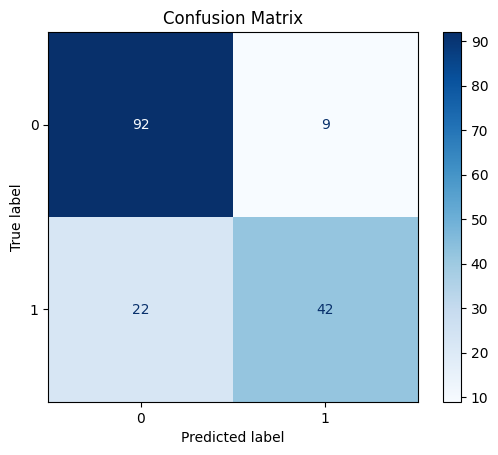

In [194]:
# Create the confusion matrix
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
conf_matrix = confusion_matrix(y_test, y_pred)

# Display the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=model.classes_)
disp.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.show()

# Tuining the best parameter

In [195]:
#Here the model is not well-fitted based on train and test accuracy. so we have to tune best parameters to solve the problem.
# Define the parameter grid
from sklearn.model_selection import GridSearchCV
param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 50, 10, 15],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Initialize the model
model = DecisionTreeClassifier()

# Initialize GridSearchCV
grid_search = GridSearchCV(model, param_grid, cv=5, scoring='accuracy')

# Fit the GridSearchCV to the training data
grid_search.fit(X_train, y_train)

# Get the best parameters and estimator
best_params = grid_search.best_params_
best_estimator = grid_search.best_estimator_

print('Best Hyperparameters:', best_params)


Best Hyperparameters: {'criterion': 'gini', 'max_depth': 10, 'min_samples_leaf': 4, 'min_samples_split': 5}


In [213]:
# Initialize the model with specified hyperparameters
model = DecisionTreeClassifier(criterion='entropy', max_depth=10, min_samples_leaf=4, min_samples_split=5)

# Fit the model to the training data
model.fit(X_train, y_train)

# Calculate and print the training and testing accuracy
print("Training Accuracy:", model.score(X_train, y_train))
print("Testing Accuracy:", model.score(X_test, y_test))

Training Accuracy: 0.8919330289193302
Testing Accuracy: 0.8181818181818182


In [214]:
# Predict the labels for the test set
y
y_pred = model.predict(X_test)

# Print the predictions
print("Predictions on the test set:", y_pred)

Predictions on the test set: [0 1 0 0 0 0 0 0 0 0 1 0 0 0 0 1 1 0 0 0 1 0 0 0 1 0 0 0 0 0 1 1 0 0 1 1 0
 1 0 0 0 1 0 0 0 0 0 0 1 0 0 0 0 0 1 0 1 1 0 0 0 0 1 0 1 0 0 1 0 0 1 1 0 0
 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 1 0 0 0 1 0 0 0 0 0 0 0 0 0 1 0 1 0 1 1 0 0
 0 0 0 0 0 0 0 1 0 1 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 1 0 0 1 0 0 0 0
 1 0 0 0 1 0 1 0 0 1 0 0 0 0 1 0 0]


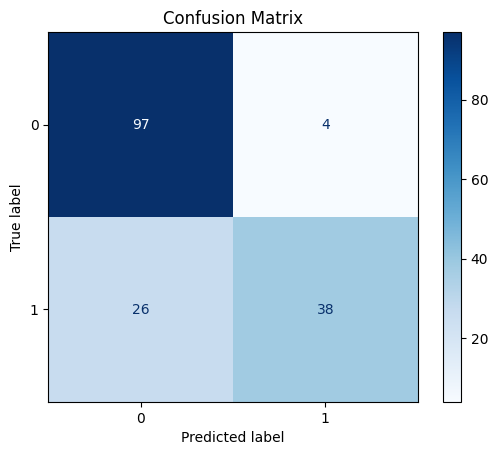

In [215]:
# Create the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Display the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=model.classes_)
disp.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.show()

# From the above model we can conclude that
The model is well-fitted.
Train accuracy and test accuracy is good

In [227]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=30)
rf.fit(X_train, y_train)

RandomForestClassifier(n_estimators=30)

In [228]:
y_predicted = model.predict(X_test)
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_predicted)
cm

array([[93,  8],
       [26, 38]])

Text(95.72222222222221, 0.5, 'Truth')

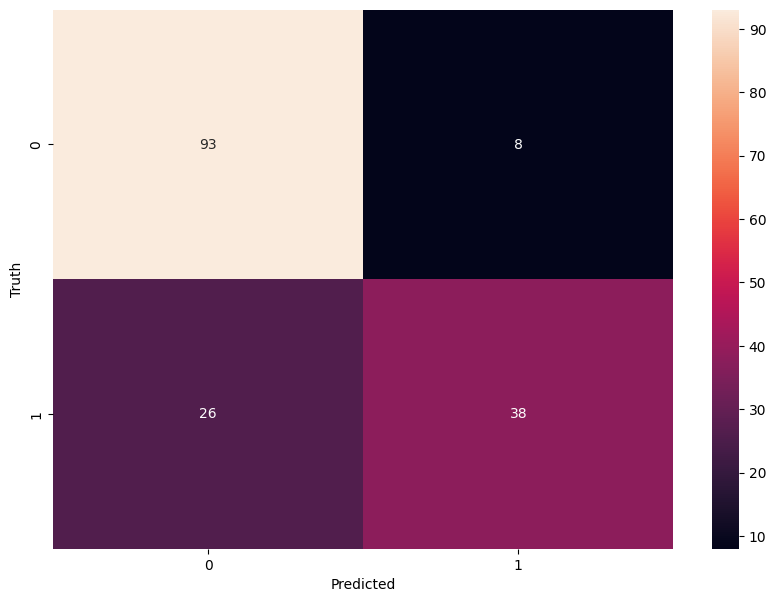

In [229]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sn
plt.figure(figsize=(10,7))
sn.heatmap(cm, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')

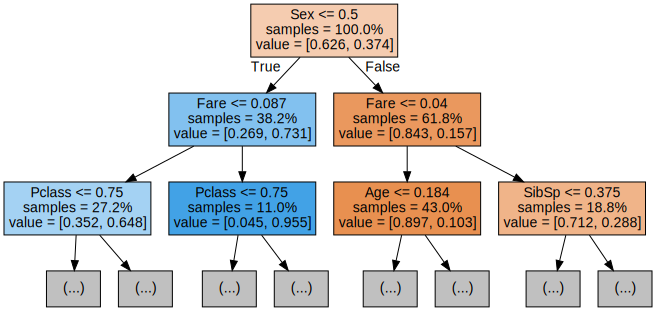

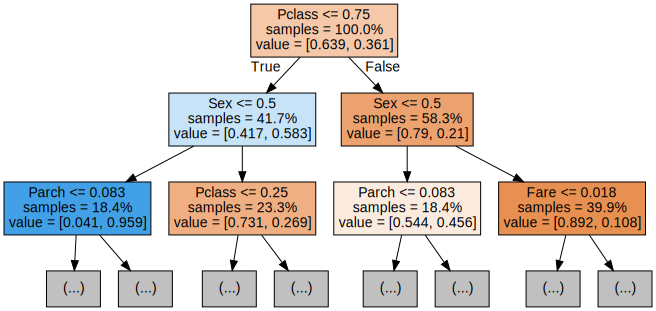

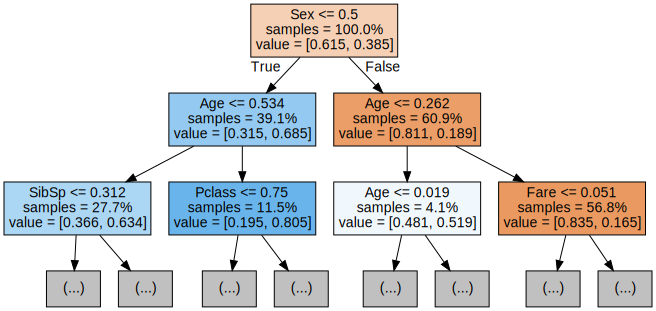

In [230]:

# Tree Visualisation
from sklearn.tree import export_graphviz
from IPython.display import Image
import graphviz
# Export the first three decision trees from the forest

for i in range(3):
    tree = rf.estimators_[i]
    dot_data = export_graphviz(tree,
                               feature_names=X_train.columns,
                               filled=True,
                               max_depth=2,
                               impurity=False,
                               proportion=True)
    graph = graphviz.Source(dot_data)
    display(graph)

In [234]:
from scipy.stats import randint
from sklearn.model_selection import RandomizedSearchCV
param_dist = {'n_estimators': randint(50,500),
              'max_depth': randint(1,20)}

# Create a random forest classifier
rf = RandomForestClassifier()

# Use random search to find the best hyperparameters
rand_search = RandomizedSearchCV(rf,
                                 param_distributions = param_dist,
                                 n_iter=5,
                                 cv=5)

# Fit the random search object to the data
rand_search.fit(X_train, y_train)

RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(), n_iter=5,
                   param_distributions={'max_depth': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x7b4f1f7d5f30>,
                                        'n_estimators': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x7b4f1f5be710>})

In [235]:
# Create a variable for the best model
best_rf = rand_search.best_estimator_

# Print the best hyperparameters
print('Best hyperparameters:',  rand_search.best_params_)

Best hyperparameters: {'max_depth': 9, 'n_estimators': 394}


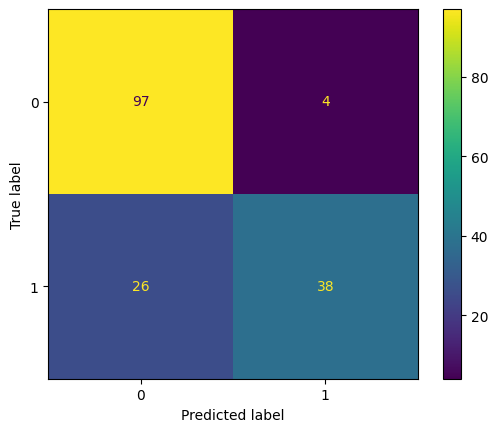

In [236]:
# Generate predictions with the best model
y_pred = best_rf.predict(X_test)

# Create the confusion matrix
cm = confusion_matrix(y_test, y_pred)

ConfusionMatrixDisplay(confusion_matrix=cm).plot();

In [237]:
y_pred = knn.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)

NameError: name 'knn' is not defined